<h1 align="center"> Graph Generator Function </h1>
<h3 align= "right"> - Kunal & Veera Vignesh </h3>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Scope-of-the-Project" data-toc-modified-id="Scope-of-the-Project-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scope of the Project</a></span></li><li><span><a href="#Requirements-for-project" data-toc-modified-id="Requirements-for-project-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Requirements for project</a></span></li><li><span><a href="#Function-Definition" data-toc-modified-id="Function-Definition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Function Definition</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Limitation:" data-toc-modified-id="Limitation:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Limitation:</a></span></li></ul></div>

## Problem Statement

- The basis of all data analysis is through EDA
- Basis of EDA is to describe the data and visualize it
- Sometimes creating chart for analysis may be cumbersome
- This project aims in making it easier by automating the creation of chart for univariate analysis

## Scope of the Project
- It is a function **graph()** which takes in three arguments - **data,columns,directory**
- Data is passed as a string with respective file type
- Have to check for the type of the file and use appropriate function for data processing
- Specific column names can be given as a list or by default it assumes the whole column range
- Specify the directory on which the file is located or by default it assumes the current dir as the data source location
- This directory will be used for storage of exported pictures
- Function plots Histogram, Box Plot for all numerical variables in the data or specified columns
- It plots Bar Chart for all Categorical Data or specified columns
- Exports it into a folder with the name of the dataset ex: (/cars/)
- All charts named based on the type of chart and the column variable name ex: MPG-Histogram.png

## Requirements for project
- To get the current directory of the user **os** module is needed
- To operate with the data set we will be using **pandas** package
- Identify the type of file by extracting the last part of the string thats passed after . separator
- make a string out of it and call appropriate pandas function 
- Store the data in the dataframe
- Select the columns which are of interest if specified by the user
- If no column name is provided proceed with the entire dataset columns
- Check for the file in the user specified location 
- If not available throw error and exit **use try and except**
- If location of the file is not given check for the file in the current working directory
- If not available throw error and exit **use try and except**
- In this step we will being processing the required
- Identify the type of variable and make two separate df for category and numerical
- Once inside each data type we use plotting function from the **matplotlib.pyplot** package to plot the graph
- Create an empty directory inside the current working dir for storage of all generated files **mkdir**
- Name the figure based on the type of variable it is **(categorical or Numerical)** and the variable for which the plot is made
- Name the fig as **variable_name-Type_of_variable.png** and store it in the folder created
- Exit the program
 


In [ ]:
# Importing all necessary packages for the function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import os

#Setting plotting style
sns.set_style("darkgrid")

## Function Definition

In [1]:
def graph(data, column=None, directory=None):
    '''Function Graph Takes in all standard file types supported by pandas..
    ``data`` takes in the file name with extension
    ``column`` is used to specify the column labels for which the graph is to be 
    created
    ``directory`` takes in the location of the file and location where the created graph to be saved'''

    # Setting directory to current directory if No value is provided
    if directory == None:
        directory = os.getcwd()

    # Modify df based on user provided column name
    if column != None:
        df = df[column]

    # Get the file type and filename from data
    filename = data[:data.find('.')]
    filetype = data[data.find('.')+1:]

    # Make directory in the filename and change cwd to that folder to store all data in that
    # Handling Removing of empty directory in the name of filename
    if filename not in os.listdir(directory):
        os.mkdir(directory+'\\'+filename)
    else:
        os.removedirs(directory+'\\'+filename)
        os.mkdir(directory+'\\'+filename)

    # Combining file types to call relevant read function
    

    # Evaluating the file based on the filename provided and storing it in the dataframe
    # Handling multiple file types
    try:
        if filetype=='xlsx':
            df=pd.read_excel(data)
        else:
            read = "pd.read_"+filetype
            df = eval(read)(data)
    except AttributeError as ae:
        print(ae)

    # Separate Numerical and Categorical data
    categorical = df.select_dtypes(include="object")
    numerical = df.select_dtypes(exclude="object")
    fig, ax = plt.subplots(1, 1)

    # Changing directory to save all graph
    os.chdir(directory+'\\'+filename)
    
    #Plotting correlation
    sns_plot=sns.heatmap(df.corr(),annot=True)
    fig = sns_plot.get_figure()
    #sns_plot.savefig(data.upper()+'-correlation.png')
    fig.savefig('correlation.png')
    plt.clf()
    plt.close()

    for i in list(numerical.columns):

        # Generating histogram for all numerical columns
        fig, ax = plt.subplots(1, 1)
        table(ax, np.round(numerical[i].describe(include=['O']), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2]);
        plt.hist(numerical[i])
        plt.title('Histogram of ' + i.upper())
        plt.xlabel(i.upper())
        plt.ylabel("Frequency")
        plt.savefig(i.upper()+'-Histogram.png')
        plt.clf()
        plt.close()

        # Generating BoxPlot for all numerical columns
        fig, ax = plt.subplots(1, 1)
        table(ax, np.round(numerical[i].describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2]);
        plt.boxplot(numerical[i])
        plt.title('Box Plot of ' + i.upper())
        plt.ylabel(i.upper())
        plt.savefig(i.upper()+'-box.png')
        plt.clf()
        plt.close()
    for c in list(categorical.columns):
#         # Plotting Bar chart
        if len(categorical[c].unique()) <= 30:
            fig, ax = plt.subplots(1, 1)
            plt.bar(categorical[c].unique(), categorical[c].value_counts())
            table(ax,(categorical[c].describe()),loc='upper right', colWidths=[0.2, 0.2, 0.2]);
            plt.title('Bar Graph of ' + c.upper())
            plt.ylabel('Frequency')
            plt.savefig(c.upper()+'-bar.png')
            plt.clf()
            plt.close()
    #Opening the folder
    os.startfile(os.getcwd())
    # Changing directory to parent
    os.chdir('..')

In [ ]:
#Function Call
graph('attrition.xlsx')

In [ ]:
os.startfile(os.getcwd())

## Results
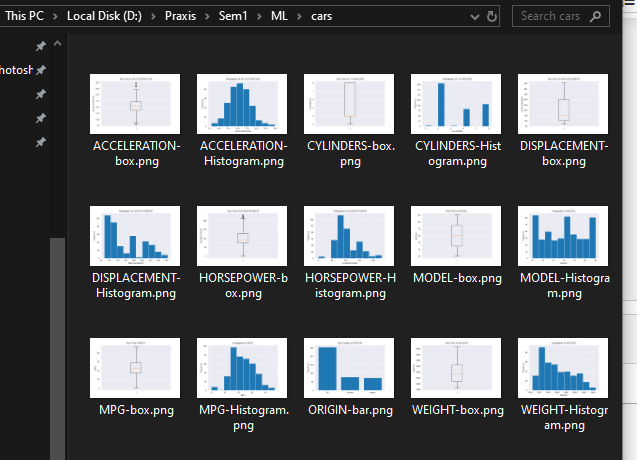

## Limitation:
- For safety this program will not delete folders with contents in it
- shutil.tree() can be used for recursive delete if files in that folder is to be cleaned
- For Categorical variable with more than 30 Unique values will not be considered by the function for plotting
